# <span style=color:darkblue>07 projecte datascience-k-means</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from mpl_toolkits.mplot3d import Axes3D

#Normalització
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

#Train test
from sklearn.model_selection import train_test_split

#K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

#metriques
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#Regresion
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#PCA
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

#kneed, to identify the elbow point programmatically
from kneed import KneeLocator

import warnings
warnings.filterwarnings('ignore')

## <span style=color:darkblue>DataFrame Types rendiment</span>

In [2]:
df = pd.read_csv('.\\datasets_definitius\\df_finance_attributs_all.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.describe()

,id,rarity,amount_dolars,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
count,34855.000000,34855.000000,3.485500e+04,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,...,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000
mean,5506.306785,0.100973,2.897959e+04,14.611954,1197.354675,1.083718,36.115634,2019.979831,5.019165,15.959690,...,0.004619,0.001521,0.003414,0.011390,0.008062,0.008119,0.002037,0.002668,0.015608,0.003472
std,2652.762722,0.043717,9.932767e+04,51.477596,974.235314,1.388433,306.463095,1.329693,3.125331,8.375266,...,0.067808,0.038966,0.058332,0.106116,0.089427,0.089742,0.045088,0.051586,0.123953,0.058818
min,1.000000,0.000200,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3258.000000,0.061466,1.297600e+02,0.600000,272.692000,0.000000,0.000000,2019.000000,2.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5565.000000,0.103943,6.212960e+03,6.480000,1224.200000,1.000000,0.826673,2021.000000,4.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7819.000000,0.119104,4.277070e+04,21.990000,1848.460000,2.000000,1.975408,2021.000000,7.000000,23.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9998.000000,0.681778,7.670020e+06,4200.000000,4168.700000,12.000000,25195.513196,2021.000000,12.000000,31.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df

,id,type_x,rarity,amount_dolars,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,1,Male,0.094547,36890.60,60.00,614.843,2,7.171077,2020,11,...,0,0,0,0,0,0,0,0,0,0
1,1,Male,0.094547,36890.60,60.00,614.843,2,7.171077,2020,11,...,0,0,0,0,0,0,0,0,0,0
2,1,Male,0.094547,5144.36,31.00,165.947,1,44.917140,2019,4,...,0,0,0,0,0,0,0,0,0,0
3,1,Male,0.094547,5144.36,31.00,165.947,1,44.917140,2019,4,...,0,0,0,0,0,0,0,0,0,0
4,1,Male,0.094547,114.53,0.42,272.692,0,0.000000,2017,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,0.054166,59882.40,38.00,1575.850,1,5.848119,2021,3,...,0,0,0,0,0,0,0,0,0,0
34851,9998,Female,0.054166,59882.40,38.00,1575.850,1,5.848119,2021,3,...,0,0,0,0,0,0,0,0,0,0
34852,9998,Female,0.054166,10239.60,15.00,682.642,0,0.000000,2020,12,...,0,0,0,0,0,0,0,0,0,1
34853,9998,Female,0.054166,10239.60,15.00,682.642,0,0.000000,2020,12,...,0,0,0,0,0,0,0,0,0,0


### <span style=color:darkred>labelencoder</span>

In [6]:
labelencoder = LabelEncoder()

In [7]:
df['type_le'] = labelencoder.fit_transform(df['type_x'])

In [8]:
#Reorganizar columans DataFrame
df = df[['id',
 'type_x',
 'type_le',
'Redimiento',
 'rarity',
 'adj_close',
 'Num_venta',
 'amount_eth',
 '3D Glasses',
 'Bandana',
 'Beanie',
 'Big Beard',
 'Big Shades',
 'Black Lipstick',
 'Blonde Bob',
 'Blonde Short',
 'Blue Eye Shadow',
 'Buck Teeth',
 'Cap',
 'Cap Forward',
 'Chinstrap',
 'Choker',
 'Cigarette',
 'Classic Shades',
 'Clown Eyes Blue',
 'Clown Eyes Green',
 'Clown Hair Green',
 'Clown Nose',
 'Cowboy Hat',
 'Crazy Hair',
 'Dark Hair',
 'Do-rag',
 'Earring',
 'Eye Mask',
 'Eye Patch',
 'Fedora',
 'Front Beard',
 'Front Beard Dark',
 'Frown',
 'Frumpy Hair',
 'Goat',
 'Gold Chain',
 'Green Eye Shadow',
 'Half Shaved',
 'Handlebars',
 'Headband',
 'Hoodie',
 'Horned Rim Glasses',
 'Hot Lipstick',
 'Knitted Cap',
 'Luxurious Beard',
 'Medical Mask',
 'Messy Hair',
 'Mohawk',
 'Mohawk Dark',
 'Mohawk Thin',
 'Mole',
 'Mustache',
 'Muttonchops',
 'Nerd Glasses',
 'Normal Beard',
 'Normal Beard Black',
 'Orange Side',
 'Peak Spike',
 'Pigtails',
 'Pilot Helmet',
 'Pink With Hat',
 'Pipe',
 'Police Cap',
 'Purple Eye Shadow',
 'Purple Hair',
 'Purple Lipstick',
 'Red Mohawk',
 'Regular Shades',
 'Rosy Cheeks',
 'Shadow Beard',
 'Shaved Head',
 'Silver Chain',
 'Small Shades',
 'Smile',
 'Spots',
 'Straight Hair',
 'Straight Hair Blonde',
 'Straight Hair Dark',
 'Stringy Hair',
 'Tassle Hat',
 'Tiara',
 'Top Hat',
 'VR',
 'Vampire Hair',
 'Vape',
 'Welding Goggles',
 'Wild Blonde',
 'Wild Hair',
 'Wild White Hair']]

In [9]:
df_definitivo = pd.DataFrame(df.iloc[ : , 0:8])
df_definitivo

,id,type_x,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth
0,1,Male,3,7.171077,0.094547,614.843,2,60.00
1,1,Male,3,7.171077,0.094547,614.843,2,60.00
2,1,Male,3,44.917140,0.094547,165.947,1,31.00
3,1,Male,3,44.917140,0.094547,165.947,1,31.00
4,1,Male,3,0.000000,0.094547,272.692,0,0.42
...,...,...,...,...,...,...,...,...
34850,9998,Female,2,5.848119,0.054166,1575.850,1,38.00
34851,9998,Female,2,5.848119,0.054166,1575.850,1,38.00
34852,9998,Female,2,0.000000,0.054166,682.642,0,15.00
34853,9998,Female,2,0.000000,0.054166,682.642,0,15.00


### <span style=color:darkred>Normalitzar les dades</span>

In [10]:
df

,id,type_x,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,3D Glasses,Bandana,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Male,3,0.000000,0.094547,272.692,0,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34851,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34852,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,0,1
34853,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_scaler = pd.DataFrame(df)
df_scaler

,id,type_x,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,3D Glasses,Bandana,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Male,3,0.000000,0.094547,272.692,0,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34851,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34852,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,0,1
34853,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_scaler = df_scaler.iloc[ : , 2:8]

In [13]:
df_scaler

,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth
0,3,7.171077,0.094547,614.843,2,60.00
1,3,7.171077,0.094547,614.843,2,60.00
2,3,44.917140,0.094547,165.947,1,31.00
3,3,44.917140,0.094547,165.947,1,31.00
4,3,0.000000,0.094547,272.692,0,0.42
...,...,...,...,...,...,...
34850,2,5.848119,0.054166,1575.850,1,38.00
34851,2,5.848119,0.054166,1575.850,1,38.00
34852,2,0.000000,0.054166,682.642,0,15.00
34853,2,0.000000,0.054166,682.642,0,15.00


In [14]:
scalerN = Normalizer()

In [15]:
df_scaler.iloc[ : , 0:8]

,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth
0,3,7.171077,0.094547,614.843,2,60.00
1,3,7.171077,0.094547,614.843,2,60.00
2,3,44.917140,0.094547,165.947,1,31.00
3,3,44.917140,0.094547,165.947,1,31.00
4,3,0.000000,0.094547,272.692,0,0.42
...,...,...,...,...,...,...
34850,2,5.848119,0.054166,1575.850,1,38.00
34851,2,5.848119,0.054166,1575.850,1,38.00
34852,2,0.000000,0.054166,682.642,0,15.00
34853,2,0.000000,0.054166,682.642,0,15.00


In [16]:
#Normalitzem les variable numeriques
df_scaler.iloc[ : , 0:8]= scalerN.fit_transform(df_scaler.iloc[ : , 0:8])

In [17]:
df_scaler

,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth
0,0.004856,0.011607,0.000153,0.995188,0.003237,0.097116
1,0.004856,0.011607,0.000153,0.995188,0.003237,0.097116
2,0.017170,0.257081,0.000541,0.949790,0.005723,0.177427
3,0.017170,0.257081,0.000541,0.949790,0.005723,0.177427
4,0.011001,0.000000,0.000347,0.999938,0.000000,0.001540
...,...,...,...,...,...,...
34850,0.001269,0.003710,0.000034,0.999701,0.000634,0.024107
34851,0.001269,0.003710,0.000034,0.999701,0.000634,0.024107
34852,0.002929,0.000000,0.000079,0.999754,0.000000,0.021968
34853,0.002929,0.000000,0.000079,0.999754,0.000000,0.021968


### <span style=color:darkred>Cantidad de Clusters</span>

In [18]:
sse = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaler)
    
    sse.append(kmeans.inertia_)

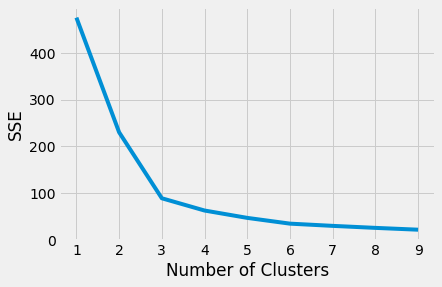

In [19]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse) 
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [20]:
kl = KneeLocator(range(1, 10), sse, 
                 curve="convex", 
                 direction="decreasing")

kl.elbow

3

### <span style=color:darkred>Cantidad de Clusters</span>

In [21]:
clustering = KMeans(n_clusters=kl.elbow,max_iter=300)
clustering.fit(df_scaler)

KMeans(n_clusters=3)

In [22]:
clustering.labels_

array([0, 0, 2, ..., 0, 0, 0])

In [23]:
df['Kmeans_Clustering']= clustering.labels_
df_definitivo['Kmeans_Clustering_types']= clustering.labels_
df_scaler['Kmeans_Clustering']= clustering.labels_
df.to_csv('.\\clusters\\df_rendimen_type_fin_tot_escalat.csv')
df_definitivo.to_csv('.\\clusters\\definitivo_rendimen_type_fin_tot_escalat.csv')
df_scaler

,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,Kmeans_Clustering
0,0.004856,0.011607,0.000153,0.995188,0.003237,0.097116,0
1,0.004856,0.011607,0.000153,0.995188,0.003237,0.097116,0
2,0.017170,0.257081,0.000541,0.949790,0.005723,0.177427,2
3,0.017170,0.257081,0.000541,0.949790,0.005723,0.177427,2
4,0.011001,0.000000,0.000347,0.999938,0.000000,0.001540,0
...,...,...,...,...,...,...,...
34850,0.001269,0.003710,0.000034,0.999701,0.000634,0.024107,0
34851,0.001269,0.003710,0.000034,0.999701,0.000634,0.024107,0
34852,0.002929,0.000000,0.000079,0.999754,0.000000,0.021968,0
34853,0.002929,0.000000,0.000079,0.999754,0.000000,0.021968,0


### <span style=color:darkred>Cantidad de Clusters</span>

In [24]:
pca = PCA(n_components=2)

In [25]:
pca_df = pca.fit_transform (df_scaler)

In [26]:
pca_df

array([[-0.0563282 ,  0.05135764],
       [-0.0563282 ,  0.05135764],
       [ 1.95342967, -0.01620492],
       ...,
       [-0.0610805 ,  0.00442679],
       [-0.0610805 ,  0.00442679],
       [-0.0610805 ,  0.00442679]])

In [27]:
pca_df_df = pd.DataFrame(pca_df, columns=['componente1', 'componente2'])
pca_df_df

,componente1,componente2
0,-0.056328,0.051358
1,-0.056328,0.051358
2,1.953430,-0.016205
3,1.953430,-0.016205
4,-0.061591,-0.005028
...,...,...
34850,-0.060363,0.004784
34851,-0.060363,0.004784
34852,-0.061080,0.004427
34853,-0.061080,0.004427


In [28]:
pca_df_df['Kmeans_Clustering']= clustering.labels_
pca_df_df
pca_df_df.to_csv('.\\clusters\\df_pca_rendiment.csv')

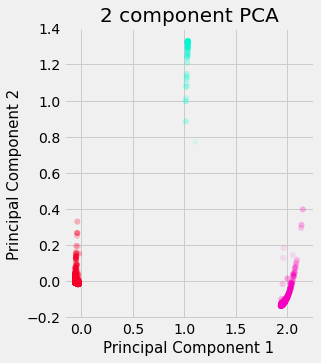

In [29]:
fig = plt.figure(figsize=(4,5))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(x = pca_df_df.componente1, y= pca_df_df.componente2,
          c = pca_df_df.Kmeans_Clustering , edgecolor='none', alpha=0.1,
           cmap=plt.cm.get_cmap('gist_rainbow', 10))

### <span style=color:darkred>Evaulació</span>

In [30]:
silhouette_score(df_scaler, clustering.labels_).round(4)

0.982

In [31]:
df

,id,type_x,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,3D Glasses,Bandana,...,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair,Kmeans_Clustering
0,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,Male,3,44.917140,0.094547,165.947,1,31.00,0,0,...,0,0,0,0,0,0,0,0,0,2
4,1,Male,3,0.000000,0.094547,272.692,0,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34851,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,0,...,0,0,0,0,0,0,0,0,0,0
34852,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,1,0
34853,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,0,...,0,0,0,0,0,0,0,0,0,0


## <span style=color:darkblue>DataFrame Attributes rendiment</span>

In [32]:
df = pd.read_csv('.\\datasets_definitius\\df_rend_traits.csv')

In [33]:
df = df.drop(['Unnamed: 0'], axis=1)

In [34]:
df.describe()

,id,rarity,amount_eth,adj_close,Num_venta,Redimiento
count,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000,34855.000000
mean,5506.306785,0.100973,14.611954,1197.354675,1.083718,36.115634
std,2652.762722,0.043717,51.477596,974.235314,1.388433,306.463095
min,1.000000,0.000200,0.000000,0.000000,0.000000,0.000000
25%,3258.000000,0.061466,0.600000,272.692000,0.000000,0.000000
50%,5565.000000,0.103943,6.480000,1224.200000,1.000000,0.826673
75%,7819.000000,0.119104,21.990000,1848.460000,2.000000,1.975408
max,9998.000000,0.681778,4200.000000,4168.700000,12.000000,25195.513196


In [35]:
df_definitivo['idaccesori'] = df['accesories2']

In [36]:
df

,id,type_x,rarity,amount_eth,adj_close,Num_venta,Redimiento,accesories2
0,1,Male,0.094547,60.00,614.843,2,7.171077,Smile
1,1,Male,0.094547,60.00,614.843,2,7.171077,Mohawk
2,1,Male,0.094547,31.00,165.947,1,44.917140,Smile
3,1,Male,0.094547,31.00,165.947,1,44.917140,Mohawk
4,1,Male,0.094547,0.42,272.692,0,0.000000,Smile
...,...,...,...,...,...,...,...,...
34850,9998,Female,0.054166,38.00,1575.850,1,5.848119,Black Lipstick
34851,9998,Female,0.054166,38.00,1575.850,1,5.848119,Clown Eyes Green
34852,9998,Female,0.054166,15.00,682.642,0,0.000000,Wild White Hair
34853,9998,Female,0.054166,15.00,682.642,0,0.000000,Black Lipstick


### <span style=color:darkred>labelencoder</span>

In [37]:
labelencoder = LabelEncoder()

In [38]:
#df['type_le'] = labelencoder.fit_transform(df['type_x'])
df['accesories_le'] = labelencoder.fit_transform(df['accesories2'])

In [39]:
columans = list(df.columns)

In [40]:
df = df[[
 'accesories_le',
 'Num_venta',
 'rarity',
 'amount_eth',
 'adj_close',
 'Redimiento']]

In [41]:
df

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,71,2,0.094547,60.00,614.843,7.171077
1,45,2,0.094547,60.00,614.843,7.171077
2,71,1,0.094547,31.00,165.947,44.917140
3,45,1,0.094547,31.00,165.947,44.917140
4,71,0,0.094547,0.42,272.692,0.000000
...,...,...,...,...,...,...
34850,5,1,0.054166,38.00,1575.850,5.848119
34851,17,1,0.054166,38.00,1575.850,5.848119
34852,86,0,0.054166,15.00,682.642,0.000000
34853,5,0,0.054166,15.00,682.642,0.000000


### <span style=color:darkred>Normalitzar les dades</span>

In [42]:
df

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,71,2,0.094547,60.00,614.843,7.171077
1,45,2,0.094547,60.00,614.843,7.171077
2,71,1,0.094547,31.00,165.947,44.917140
3,45,1,0.094547,31.00,165.947,44.917140
4,71,0,0.094547,0.42,272.692,0.000000
...,...,...,...,...,...,...
34850,5,1,0.054166,38.00,1575.850,5.848119
34851,17,1,0.054166,38.00,1575.850,5.848119
34852,86,0,0.054166,15.00,682.642,0.000000
34853,5,0,0.054166,15.00,682.642,0.000000


In [43]:
#df = df.drop(['Year','Month','YearMonth','type_x','type_y','idpunks','accesories2','Unnamed: 14'],axis=1)

In [44]:
df_scaler = pd.DataFrame(df)
df_scaler

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,71,2,0.094547,60.00,614.843,7.171077
1,45,2,0.094547,60.00,614.843,7.171077
2,71,1,0.094547,31.00,165.947,44.917140
3,45,1,0.094547,31.00,165.947,44.917140
4,71,0,0.094547,0.42,272.692,0.000000
...,...,...,...,...,...,...
34850,5,1,0.054166,38.00,1575.850,5.848119
34851,17,1,0.054166,38.00,1575.850,5.848119
34852,86,0,0.054166,15.00,682.642,0.000000
34853,5,0,0.054166,15.00,682.642,0.000000


In [45]:
df_scaler.iloc[ : , 0:7]

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,71,2,0.094547,60.00,614.843,7.171077
1,45,2,0.094547,60.00,614.843,7.171077
2,71,1,0.094547,31.00,165.947,44.917140
3,45,1,0.094547,31.00,165.947,44.917140
4,71,0,0.094547,0.42,272.692,0.000000
...,...,...,...,...,...,...
34850,5,1,0.054166,38.00,1575.850,5.848119
34851,17,1,0.054166,38.00,1575.850,5.848119
34852,86,0,0.054166,15.00,682.642,0.000000
34853,5,0,0.054166,15.00,682.642,0.000000


In [46]:
scalerN = Normalizer()

In [47]:
#Normalitzem les variable numeriques
df_scaler.iloc[ : , 0:7]= scalerN.fit_transform(df_scaler.iloc[ : , 0:7])

In [48]:
df_scaler

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,0.114171,0.003216,0.000152,0.096482,0.988692,0.011531
1,0.072646,0.003229,0.000153,0.096861,0.992570,0.011577
2,0.376516,0.005303,0.000501,0.164394,0.880025,0.238198
3,0.249450,0.005543,0.000524,0.171844,0.919900,0.248991
4,0.251966,0.000000,0.000336,0.001491,0.967735,0.000000
...,...,...,...,...,...,...
34850,0.003172,0.000634,0.000034,0.024107,0.999697,0.003710
34851,0.010784,0.000634,0.000034,0.024105,0.999644,0.003710
34852,0.124963,0.000000,0.000079,0.021796,0.991922,0.000000
34853,0.007323,0.000000,0.000079,0.021968,0.999732,0.000000


In [49]:
df_scaler.iloc[ : , 0:6]

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento
0,0.114171,0.003216,0.000152,0.096482,0.988692,0.011531
1,0.072646,0.003229,0.000153,0.096861,0.992570,0.011577
2,0.376516,0.005303,0.000501,0.164394,0.880025,0.238198
3,0.249450,0.005543,0.000524,0.171844,0.919900,0.248991
4,0.251966,0.000000,0.000336,0.001491,0.967735,0.000000
...,...,...,...,...,...,...
34850,0.003172,0.000634,0.000034,0.024107,0.999697,0.003710
34851,0.010784,0.000634,0.000034,0.024105,0.999644,0.003710
34852,0.124963,0.000000,0.000079,0.021796,0.991922,0.000000
34853,0.007323,0.000000,0.000079,0.021968,0.999732,0.000000


In [50]:
X = np.array(df_scaler.iloc[ : , 0:6])
X

array([[1.14170879e-01, 3.21608110e-03, 1.52035249e-04, 9.64824330e-02,
        9.88692476e-01, 1.15313821e-02],
       [7.26456520e-02, 3.22869565e-03, 1.52631582e-04, 9.68608694e-02,
        9.92570459e-01, 1.15766120e-02],
       [3.76516308e-01, 5.30304660e-03, 5.01386616e-04, 1.64394444e-01,
        8.80024673e-01, 2.38197684e-01],
       ...,
       [1.24963428e-01, 0.00000000e+00, 7.87073430e-05, 2.17959467e-02,
        9.91921908e-01, 0.00000000e+00],
       [7.32251945e-03, 0.00000000e+00, 7.93270500e-05, 2.19675583e-02,
        9.99731864e-01, 0.00000000e+00],
       [2.48895207e-02, 0.00000000e+00, 7.93046012e-05, 2.19613418e-02,
        9.99448951e-01, 0.00000000e+00]])

### <span style=color:darkred>Cantidad de Clusters</span>

In [51]:
sse = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaler)
    
    sse.append(kmeans.inertia_)

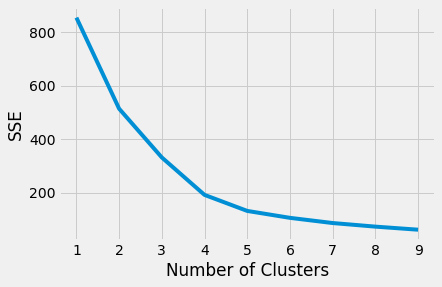

In [52]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse) 
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [53]:
kl = KneeLocator(range(1, 10), sse, 
                 curve="convex", 
                 direction="decreasing")

kl.elbow

4

### <span style=color:darkred>Cantidad de Clusters</span>

In [54]:
clustering = KMeans(n_clusters=kl.elbow,max_iter=300)
clustering.fit(df_scaler)

KMeans(n_clusters=4)

In [55]:
clustering.labels_

array([0, 0, 2, ..., 0, 0, 0])

In [56]:
df['Kmeans_Clustering']= clustering.labels_
df_definitivo['Kmeans_Clustering_attiributes']= clustering.labels_
df_scaler['Kmeans_Clustering']= clustering.labels_
df.to_csv('.\\clusters\\df_rendimen_Attri_fin_tot_escalat.csv')
df_definitivo.to_csv('.\\clusters\\definitivo_rendimen_type_fin_tot_escalat.csv')
df

,accesories_le,Num_venta,rarity,amount_eth,adj_close,Redimiento,Kmeans_Clustering
0,0.114171,0.003216,0.000152,0.096482,0.988692,0.011531,0
1,0.072646,0.003229,0.000153,0.096861,0.992570,0.011577,0
2,0.376516,0.005303,0.000501,0.164394,0.880025,0.238198,2
3,0.249450,0.005543,0.000524,0.171844,0.919900,0.248991,2
4,0.251966,0.000000,0.000336,0.001491,0.967735,0.000000,2
...,...,...,...,...,...,...,...
34850,0.003172,0.000634,0.000034,0.024107,0.999697,0.003710,0
34851,0.010784,0.000634,0.000034,0.024105,0.999644,0.003710,0
34852,0.124963,0.000000,0.000079,0.021796,0.991922,0.000000,0
34853,0.007323,0.000000,0.000079,0.021968,0.999732,0.000000,0


### <span style=color:darkred>Cantidad de Clusters</span>

In [57]:
pca = PCA(n_components=2)

In [58]:
pca_df = pca.fit_transform (df_scaler)

In [59]:
pca_df

array([[-0.47826264,  0.06146944],
       [-0.4818862 ,  0.02487487],
       [ 1.54495177,  0.10942224],
       ...,
       [-0.47775526,  0.06843329],
       [-0.48794197, -0.03398443],
       [-0.48644374, -0.01904224]])

In [60]:
pca_df_df = pd.DataFrame(pca_df, columns=['componente1', 'componente2'])
pca_df_df

,componente1,componente2
0,-0.478263,0.061469
1,-0.481886,0.024875
2,1.544952,0.109422
3,1.533464,-0.017003
4,1.524807,0.040685
...,...,...
34850,-0.488179,-0.038603
34851,-0.487532,-0.032155
34852,-0.477755,0.068433
34853,-0.487942,-0.033984


In [61]:
pca_df_df['Kmeans_Clustering']= clustering.labels_
pca_df_df
pca_df_df.to_csv('.\\clusters\\df_pca_rendiment_traits.csv')

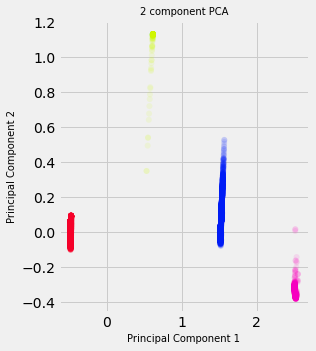

In [62]:
fig = plt.figure(figsize=(4,5))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 10)
ax.scatter(x = pca_df_df.componente1, y= pca_df_df.componente2,
          c = pca_df_df.Kmeans_Clustering , edgecolor='none', alpha=0.1,
           cmap=plt.cm.get_cmap('gist_rainbow', 5))

### <span style=color:darkred>Evaulació</span>

In [63]:
silhouette_score(df_scaler, clustering.labels_).round(4)

0.9506

In [64]:
#df['accesories_le'] = labelencoder.fit_transform(df['accesories2'])
df_definitivo['idaccesori_le'] = labelencoder.fit_transform(df_definitivo['idaccesori'])

In [108]:
df_definitivo

,id,type_x,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,Kmeans_Clustering_types,idaccesori,Kmeans_Clustering_attiributes,idaccesori_le
0,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,Smile,0,71
1,1,Male,3,7.171077,0.094547,614.843,2,60.00,0,Mohawk,0,45
2,1,Male,3,44.917140,0.094547,165.947,1,31.00,2,Smile,2,71
3,1,Male,3,44.917140,0.094547,165.947,1,31.00,2,Mohawk,2,45
4,1,Male,3,0.000000,0.094547,272.692,0,0.42,0,Smile,2,71
...,...,...,...,...,...,...,...,...,...,...,...,...
34850,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,Black Lipstick,0,5
34851,9998,Female,2,5.848119,0.054166,1575.850,1,38.00,0,Clown Eyes Green,0,17
34852,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,Wild White Hair,0,86
34853,9998,Female,2,0.000000,0.054166,682.642,0,15.00,0,Black Lipstick,0,5


In [176]:
df_definitivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34855 entries, 0 to 34854
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             34855 non-null  int64  
 1   type_x                         34855 non-null  object 
 2   type_le                        34855 non-null  int64  
 3   Redimiento                     34855 non-null  float64
 4   rarity                         34855 non-null  float64
 5   adj_close                      34855 non-null  float64
 6   Num_venta                      34855 non-null  int64  
 7   amount_eth                     34855 non-null  float64
 8   Kmeans_Clustering_types        34855 non-null  int64  
 9   idaccesori                     34844 non-null  object 
 10  Kmeans_Clustering_attiributes  34855 non-null  int64  
 11  idaccesori_le                  34855 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usag

In [177]:
df_definitivo['Kmeans_Clustering_types'].count()

34855

___Selecion del cluster 2 mas mas rentables___

In [178]:
df_definitivo_Type2= pd.DataFrame( df_definitivo[df_definitivo['Kmeans_Clustering_types']==2])

In [179]:
df_definitivo_Type2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 2 to 34801
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             953 non-null    int64  
 1   type_x                         953 non-null    object 
 2   type_le                        953 non-null    int64  
 3   Redimiento                     953 non-null    float64
 4   rarity                         953 non-null    float64
 5   adj_close                      953 non-null    float64
 6   Num_venta                      953 non-null    int64  
 7   amount_eth                     953 non-null    float64
 8   Kmeans_Clustering_types        953 non-null    int64  
 9   idaccesori                     953 non-null    object 
 10  Kmeans_Clustering_attiributes  953 non-null    int64  
 11  idaccesori_le                  953 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage:

In [180]:
df_definitivo_Type2.describe()

,id,type_le,Redimiento,rarity,adj_close,Num_venta,amount_eth,Kmeans_Clustering_types,Kmeans_Clustering_attiributes,idaccesori_le
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.0,953.00000,953.000000
mean,5491.737671,2.695698,993.361750,0.104261,1982.448582,1.352571,30.403824,2.0,2.98531,38.530955
std,2645.865509,0.478259,1556.417007,0.042559,602.238977,0.654281,45.297240,0.0,0.18275,22.644618
min,1.000000,0.000000,44.917140,0.000677,165.947000,1.000000,0.190000,2.0,0.00000,0.000000
25%,3310.000000,2.000000,518.403496,0.067163,1768.040000,1.000000,18.490000,2.0,3.00000,21.000000
50%,5254.000000,3.000000,724.304551,0.104267,1848.460000,1.000000,22.700000,2.0,3.00000,38.000000
75%,7960.000000,3.000000,1049.097997,0.120009,2109.580000,2.000000,29.990000,2.0,3.00000,52.000000
max,9969.000000,4.000000,25195.513196,0.380678,4168.700000,4.000000,800.000000,2.0,3.00000,86.000000


In [181]:
df_definitivo_Type

NameError: name 'df_definitivo_Type' is not defined

In [182]:
def tidy_corr_matrix(corr_mat):

    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [183]:
corr_matrix = df_definitivo_Type2.select_dtypes(include=['float64', 'int64']).corr()
tidy_corr_matrix(corr_matrix).head(20)

,variable_1,variable_2,r,abs_r
24,Redimiento,amount_eth,0.378812,0.378812
56,amount_eth,Redimiento,0.378812,0.378812
57,amount_eth,rarity,-0.302520,0.302520
33,rarity,amount_eth,-0.302520,0.302520
38,adj_close,Redimiento,0.229429,0.229429
22,Redimiento,adj_close,0.229429,0.229429
55,amount_eth,type_le,-0.191666,0.191666
15,type_le,amount_eth,-0.191666,0.191666
11,type_le,Redimiento,0.142265,0.142265
19,Redimiento,type_le,0.142265,0.142265


## <span style=color:darkblue>Regression Model</span>

__Ordenar el dataframe por rendiment__

In [184]:
df_definitivo_Type2['type_le'] = df_definitivo_Type2['type_le'].astype('int64')
df_definitivo_Type2['Kmeans_Clustering_types'] = df_definitivo_Type2['Kmeans_Clustering_types'].astype('int64')
df_definitivo_Type2['Kmeans_Clustering_attiributes'] = df_definitivo_Type2['Kmeans_Clustering_attiributes'].astype('int64')
df_definitivo_Type2['idaccesori_le'] = df_definitivo_Type2['idaccesori_le'].astype('int64')

In [185]:
df_definitivo_Type2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 2 to 34801
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             953 non-null    int64  
 1   type_x                         953 non-null    object 
 2   type_le                        953 non-null    int64  
 3   Redimiento                     953 non-null    float64
 4   rarity                         953 non-null    float64
 5   adj_close                      953 non-null    float64
 6   Num_venta                      953 non-null    int64  
 7   amount_eth                     953 non-null    float64
 8   Kmeans_Clustering_types        953 non-null    int64  
 9   idaccesori                     953 non-null    object 
 10  Kmeans_Clustering_attiributes  953 non-null    int64  
 11  idaccesori_le                  953 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage:

In [257]:
df_definitivo1=pd.DataFrame()

In [258]:
df_definitivo1 = df_definitivo_Type2[['type_le','Redimiento','amount_eth','adj_close']]

In [259]:
df_definitivo1.columns

Index(['type_le', 'Redimiento', 'amount_eth', 'adj_close'], dtype='object')

__Tractament de Outliers__

In [260]:
Q1 = df_definitivo1.quantile(0.25)
Q3 = df_definitivo1.quantile(0.75)
IQR = Q3 - Q1

In [261]:
IQR

type_le         1.000000
Redimiento    530.694501
amount_eth     11.500000
adj_close     341.540000
dtype: float64

In [262]:
df_definitivo2 = df_definitivo1[~((df_definitivo1 < (Q1 - 1.5 * IQR)) |(df_definitivo1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [263]:
df_definitivo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 1198 to 34801
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type_le     696 non-null    int64  
 1   Redimiento  696 non-null    float64
 2   amount_eth  696 non-null    float64
 3   adj_close   696 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 27.2 KB


In [264]:
df_definitivo2

,type_le,Redimiento,amount_eth,adj_close
1198,3,518.403496,15.00,1937.45
1199,3,518.403496,15.00,1937.45
1200,3,518.403496,15.00,1937.45
1279,3,1191.486280,15.95,1960.16
1280,3,1191.486280,15.95,1960.16
...,...,...,...,...
34786,3,400.584964,11.00,1768.04
34787,3,400.584964,11.00,1768.04
34788,3,400.584964,11.00,1768.04
34800,3,940.904897,29.30,2157.66


___Correlació___

In [265]:
def tidy_corr_matrix(corr_mat):

    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [266]:
corr_matrix = df_definitivo2.select_dtypes(include=['float64', 'int64']).corr()
tidy_corr_matrix(corr_matrix).head(20)

,variable_1,variable_2,r,abs_r
7,Redimiento,adj_close,0.255884,0.255884
13,adj_close,Redimiento,0.255884,0.255884
6,Redimiento,amount_eth,0.141035,0.141035
9,amount_eth,Redimiento,0.141035,0.141035
2,type_le,amount_eth,-0.136450,0.136450
8,amount_eth,type_le,-0.136450,0.136450
1,type_le,Redimiento,-0.072567,0.072567
4,Redimiento,type_le,-0.072567,0.072567
3,type_le,adj_close,-0.036398,0.036398
12,adj_close,type_le,-0.036398,0.036398


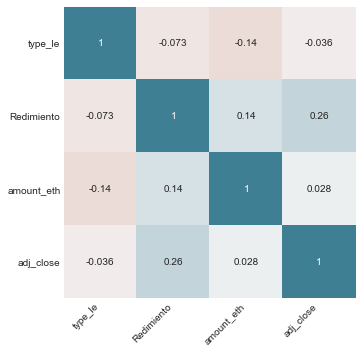

In [267]:
ig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [268]:
#df_definitivo2 = df_definitivo2[['id', 'Redimiento','type_x', 'type_le', 'rarity', 'adj_close','Num_venta', 'amount_eth', 'Kmeans_Clustering_types', 
#       'Kmeans_Clustering_attiributes','idaccesori']]

df_definitivo2

,type_le,Redimiento,amount_eth,adj_close
1198,3,518.403496,15.00,1937.45
1199,3,518.403496,15.00,1937.45
1200,3,518.403496,15.00,1937.45
1279,3,1191.486280,15.95,1960.16
1280,3,1191.486280,15.95,1960.16
...,...,...,...,...
34786,3,400.584964,11.00,1768.04
34787,3,400.584964,11.00,1768.04
34788,3,400.584964,11.00,1768.04
34800,3,940.904897,29.30,2157.66


### <span style=color:darkred>Variable resposta</span>

In [269]:
#sns.pairplot(df_definitivo)

<AxesSubplot:xlabel='Redimiento', ylabel='type_le'>

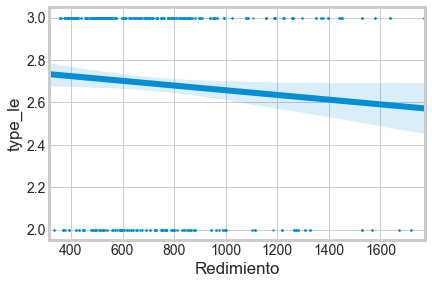

In [270]:
sns.regplot(x='Redimiento',y='type_le',data= df_definitivo2, scatter_kws={'s':2})

<AxesSubplot:xlabel='amount_eth', ylabel='type_le'>

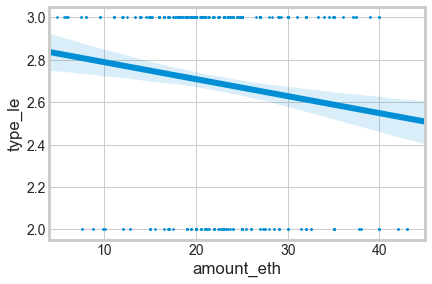

In [271]:
sns.regplot(x='amount_eth',y='type_le',data= df_definitivo2,scatter_kws={'s':2})

<AxesSubplot:xlabel='Redimiento', ylabel='amount_eth'>

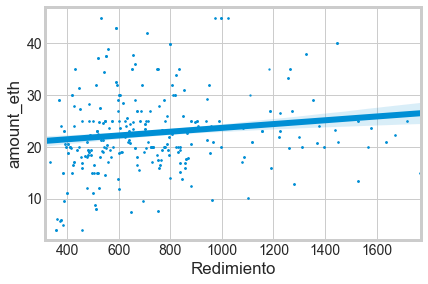

In [272]:
sns.regplot(x='Redimiento',y='amount_eth',data= df_definitivo2,scatter_kws={'s':2})

<AxesSubplot:xlabel='amount_eth', ylabel='Redimiento'>

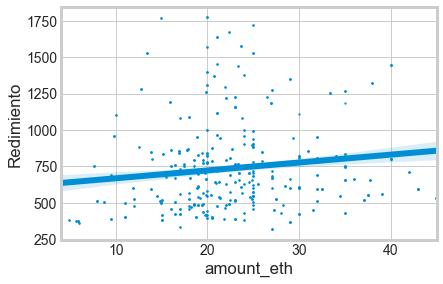

In [273]:
sns.regplot(x='amount_eth',y='Redimiento',data=df_definitivo2,scatter_kws={'s':2})

sns.regplot(x='Redimiento',y='Num_venta',data= df_definitivo2,  scatter_kws={'s':2})

sns.regplot(x='type_le',y='Num_venta',data= df_definitivo2, color='g', scatter_kws={'s':2})

### <span style=color:darkred>Train/test</span>

In [281]:
df_definitivo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 1198 to 34801
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type_le     696 non-null    int64  
 1   Redimiento  696 non-null    float64
 2   amount_eth  696 non-null    float64
 3   adj_close   696 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 27.2 KB


In [327]:
y = np.array(df_definitivo2.Redimiento).reshape(-1,1)
X = np.array(df_definitivo2.select_dtypes(include=['float64','int64']).drop(['Redimiento'],axis=1))

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=4 ) 

In [329]:
scaler = Normalizer()

In [330]:
X_train= scalerN.fit_transform(X_train)

In [331]:
#y_train= scalerN.fit_transform(y_train)

### <span style=color:darkred>modelsRegressio</span>

In [372]:
models=[LinearRegression(), Ridge(), Lasso(),DecisionTreeRegressor(),RandomForestRegressor(random_state=32)]

for model in models:
    model.fit(X_train,y_train)
    prediccions = model.predict(X_test)
    print(type(model).__name__)
    print("   MAE", mean_absolute_error(y_test,prediccions))
    print("   RMSE", (mean_squared_error(y_test,prediccions)))
    print( "  R2", r2_score(y_test,prediccions))

LinearRegression
   MAE 3828202311.9395366
   RMSE 1.4954117984769733e+19
  R2 -156273400087696.25
Ridge
   MAE 453.6734394772842
   RMSE 287129.4303223472
  R2 -2.0005575980753965
Lasso
   MAE 243.77557340702313
   RMSE 96133.62562762067
  R2 -0.0046148194688995225
DecisionTreeRegressor
   MAE 363.6592719005009
   RMSE 227646.9056685179
  R2 -1.3789538108830408
RandomForestRegressor
   MAE 248.6233190473366
   RMSE 96937.01585024952
  R2 -0.013010401329045962


### <span style=color:darkred>LinearRegression Rendimeinto</span>

In [459]:
y = np.array(df_definitivo2.Redimiento).reshape(-1,1)
X = np.array(df_definitivo2.select_dtypes(include=['float64','int64']).drop(['Redimiento'],axis=1))

In [460]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
score_test = clf.score(X_test, y_test)
lr_pred = clf.predict(X_test)
df_lr=pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':lr_pred.flatten()}, index=list(range(0, 209)))
df_lr.round(3)

,Actual,Predicted
0,400.585,3.618850e+09
1,862.766,4.856962e+09
2,543.739,3.203200e+09
3,533.664,4.841180e+09
4,664.153,3.966089e+09
...,...,...
204,376.336,3.263805e+09
205,729.449,3.682934e+09
206,495.117,3.929364e+09
207,420.175,3.648041e+09


### <span style=color:darkred>LinearRegression Amount_eth</span>

In [464]:
y = np.array(df_definitivo2.amount_eth).reshape(-1,1)
X = np.array(df_definitivo2.select_dtypes(include=['float64','int64']).drop(['amount_eth'],axis=1))

In [465]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
score_test = clf.score(X_test, y_test)
lr_pred = clf.predict(X_test)
df_lr=pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':lr_pred.flatten()}, index=list(range(0, 209)))
df_lr.round(3)

,Actual,Predicted
0,400.585,3.618850e+09
1,862.766,4.856962e+09
2,543.739,3.203200e+09
3,533.664,4.841180e+09
4,664.153,3.966089e+09
...,...,...
204,376.336,3.263805e+09
205,729.449,3.682934e+09
206,495.117,3.929364e+09
207,420.175,3.648041e+09


In [466]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 208
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     209 non-null    float64
 1   Predicted  209 non-null    float64
dtypes: float64(2)
memory usage: 4.9 KB


### <span style=color:darkred>RandomForestRegressor Rendimeinto</span>

In [467]:
y = np.array(df_definitivo2.Redimiento).reshape(-1,1)
X = np.array(df_definitivo2.select_dtypes(include=['float64','int64']).drop(['Redimiento'],axis=1))

In [468]:
clf = RandomForestRegressor(n_jobs=-1)
clf.fit(X_train, y_train)
score_test = clf.score(X_test, y_test)
lr_pred = clf.predict(X_test)
df_lr=pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':lr_pred.flatten()}, index=list(range(0, 209)))
df_lr.round(3)

,Actual,Predicted
0,400.585,688.634
1,862.766,688.634
2,543.739,688.634
3,533.664,688.634
4,664.153,688.634
...,...,...
204,376.336,688.634
205,729.449,688.634
206,495.117,688.634
207,420.175,688.634


### <span style=color:darkred>RandomForestRegressor Amount_eth</span>

In [469]:
y = np.array(df_definitivo2.amount_eth).reshape(-1,1)
X = np.array(df_definitivo2.select_dtypes(include=['float64','int64']).drop(['amount_eth'],axis=1))

In [470]:
clf = RandomForestRegressor(n_jobs=-1)
clf.fit(X_train, y_train)
score_test = clf.score(X_test, y_test)
lr_pred = clf.predict(X_test)
df_lr=pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':lr_pred.flatten()}, index=list(range(0, 209)))
df_lr.round(3)

,Actual,Predicted
0,400.585,672.386
1,862.766,672.386
2,543.739,672.386
3,533.664,672.386
4,664.153,672.386
...,...,...
204,376.336,672.386
205,729.449,672.386
206,495.117,672.386
207,420.175,672.386


In [413]:
y_test.shape

(209, 1)